# 1. Libraries and Datasets
##### Import the libraries, read the datasets and display the first five rows of each of them.

In [866]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from datetime import date

In [867]:
# Import the datasets, 
# Specify the delimeter and header

# Describes static characteristics of an account
df_account = pd.read_csv('account.csv', delimiter=';', header=0)

# Describes a credit card issued to an account
# df_card = pd.read_csv('card.csv', delimiter=';', header=0)

# Describes characteristics of a client
df_client = pd.read_csv('client.csv', delimiter=';', header=0)

# Relates together a client with an account
df_disp = pd.read_csv('disp.csv', delimiter=';', header=0)

# Describes demographic characteristics of a district
df_district = pd.read_csv('district.csv', delimiter=';', header=0)

# Describes a loan granted for a given account
# df_loan = pd.read_csv('loan.csv', delimiter=';', header=0)

# Describes characteristics of a payment order
df_order = pd.read_csv('order.csv', delimiter=';', header=0, na_values=' ') # Replace empty entries by Na

# Describes one transaction on an account
df_trans = pd.read_csv('trans.csv', delimiter=';', header=0, na_values=' ') # Replace empty entries by Na

C:\Users\carol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [868]:
df_account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [869]:
df_client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [870]:
df_disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [871]:
df_district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [872]:
df_order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,NaN


In [873]:
df_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


# 2. Data Cleaning
##### Define how each dataset should look like before the merging.

In [874]:
# Drop df_account unnecessary data
df_account.drop(columns=['frequency', 'date'], inplace=True)

# Drop df_client unnecessary data
df_client.drop(columns=['district_id'], inplace=True)

# Drop df_disp unnecessary data
df_disp.drop(columns=['type'], inplace=True)

# Drop all demographic data except district name and region
df_district.drop(columns=['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A13', 'A14', 'A15', 'A16'], inplace=True)

# Drop df_order unnecessary data
df_order.drop(columns=['bank_to'], inplace=True)

# Drop df_trans unnecessary data
df_trans.drop(columns=['balance', 'bank'], inplace=True)

In [875]:
# Rename the necessary columns
df_order.rename(columns={'account_to': 'order_receiver'}, inplace=True)
df_order.rename(columns={'amount': 'order_amount'}, inplace=True)
df_order.rename(columns={'k_symbol': 'order_char'}, inplace=True)
df_trans.rename(columns={'date': 'trans_date'}, inplace=True)
df_trans.rename(columns={'type': 'trans_type'}, inplace=True)
df_trans.rename(columns={'operation': 'trans_mode'}, inplace=True)
df_trans.rename(columns={'amount': 'trans_amount'}, inplace=True)
df_trans.rename(columns={'k_symbol': 'trans_char'}, inplace=True)
df_trans.rename(columns={'account': 'trans_receiver'}, inplace=True)
df_district.rename(columns={'A1': 'district_id'}, inplace=True)
df_district.rename(columns={'A2': 'district_name'}, inplace=True)
df_district.rename(columns={'A3': 'district_region'}, inplace=True)
df_district.rename(columns={'A11': 'average_salary'}, inplace=True)

##### 2.1. Generate the gender and age from the birth_number column and convert the trans_date column to the date format

In [876]:
# Define a function to convert the date_of_birth and trans_date values to the formatted dates
def convert_to_date (df, col):
    df [col] = pd.to_datetime (df [col], format = '%y%m%d', errors = 'coerce') # Convertion, formatting and error handling
    return df

# Define a function to calculate the age from the birth year
def calculate_age (birth_year):
    age = birth_year.year
    return 1998 - age # The dataset is from 1998

# Define a function to check if a year is being read as 1900 or 2000
def fix_date (date):
    if date.year > 2000:
        date = date.replace (year = date.year - 100)
        return date
    else:
        return date

In [877]:
# Add the columns date_of_birth, gender and age to the df_client dataset
df_client = df_client.join(pd.DataFrame({'date_of_birth': np.nan, 'gender': np.nan, 'age': np.nan}, index = df_client.index))

In [878]:
# Fill the new gender column based on the 'birth_number'
df_client ['date_of_birth'] = df_client ['birth_number']
for idx, item in enumerate (df_client ['birth_number']):
    # The value is in the format YYMM+50DD for women
    if int (str (item) [2:4]) > 50: # Extract the month and check if it's greater than 50
        df_client.loc [idx, 'gender'] = "female"
        df_client.loc [idx, 'date_of_birth'] = item - 5000 # Subtract 5000 to get the actual date of birth in the right format
    else: 
        df_client.loc [idx, 'gender'] = "male"

In [879]:
# Call the function to convert the date_of_birth and trans_date values to the formatted dates
df_client = convert_to_date(df_client, 'date_of_birth') 
df_trans = convert_to_date(df_trans, 'trans_date')

In [880]:
# Call the function to check if a year is being read as 1900 or 2000
df_client ['date_of_birth'] = df_client ['date_of_birth'].apply(fix_date)

In [881]:
# Call the function to calculate the age
df_client['age'] = df_client['date_of_birth'].apply (calculate_age)

df_client.head()

,client_id,birth_number,date_of_birth,gender,age
0,1,706213,1970-12-13,female,28
1,2,450204,1945-02-04,male,53
2,3,406009,1940-10-09,female,58
3,4,561201,1956-12-01,male,42
4,5,605703,1960-07-03,female,38


##### 2.2. Translate the types, modes and characterization (k_symbols) records from Czech to English

In [882]:
# Change df_trans > trans_char (k_symbol) values to its description
trans_char_mapping = {'POJISTNE': 'insurance payment',
                      'SLUZBY': 'payment of statement',
                      'UROK': 'interest credited',
                      'SANKC. UROK': 'sanction interest if negative balance',
                      'SIPO': 'household payment',
                      'DUCHOD': 'old-age pension payment',
                      'UVER': 'loan payment'} # Define the mapping

# Replace values in the 'k_symbol' column using the mapping
df_trans['trans_char'] = df_trans['trans_char'].replace(trans_char_mapping) # Replace the values

In [883]:
# Change df_trans > type values to credit, debit or withdrawal in cash
trans_type_mapping = {'PRIJEM': 'credit', 
                      'VYDAJ': 'debit', 
                      'VYBER': 'withdrawal in cash'} # Define the mapping

# 'VYBER': 'withdrawal in cash' comes from the trans_mode column

# Replace values in the 'type' column using the mapping
df_trans['trans_type'] = df_trans['trans_type'].replace(trans_type_mapping) # Replace the values

In [884]:
# Change df_trans > type values to its description
trans_mode_mapping = {'VYBER KARTOU': 'credit card withdrawal', 
                      'VKLAD': 'credit in cash', 
                      'PREVOD Z UCTU': 'collection from another bank',
                      'VYBER': 'withdrawal in cash', 
                      'PREVOD NA UCET': 'remittance to another bank'} # Define the mapping

# Replace values in the 'type' column using the mapping
df_trans['trans_mode'] = df_trans['trans_mode'].replace(trans_mode_mapping) # Replace the values

In [885]:
# Change df_order > order_char (k_symbol) values to its description
order_char_mapping = {"POJISTNE": 'insurance payment',
                      "SIPO": 'household payment',
                      "LEASING": 'leasing payment',
                      "UVER": 'loan payment'} # Define the mapping

# Replace values in the 'k_symbol' column using the mapping
df_order['order_char'] = df_order['order_char'].replace(order_char_mapping) # Replace the values

##### 2.3. Convert the currency records from Czech Koruna to Euro

In [886]:
# Change df_order/df_trans > order_amount/trans_amount values from Czech Koruna to Euro

czk_to_eur = 0.040 # Define the actual exchange rate

# Define a function to convert from Czech Koruna to Euro
def convert_czk_to_eur(amount_czk):
    return amount_czk * czk_to_eur

# Apply the conversion function to the 'trans_amount' column
df_order['order_amount'] = df_order['order_amount'].apply(convert_czk_to_eur)
df_trans['trans_amount'] = df_trans['trans_amount'].apply(convert_czk_to_eur)
df_district['average_salary'] = df_district['average_salary'].apply(convert_czk_to_eur)

##### 2.4. Observe, correct and replace the missing values

In [887]:
# Check the count of null values in the df_trans dataset
df_trans.isnull().sum()

trans_id               0
account_id             0
trans_date             0
trans_type             0
trans_mode        183114
trans_amount           0
trans_char        535314
trans_receiver    760931
dtype: int64

In [888]:
# Check the count of null values in the df_order dataset
df_order.isnull().sum()

order_id             0
account_id           0
order_receiver       0
order_amount         0
order_char        1379
dtype: int64

In [889]:
# Define a function to fill the null values with the median
def fill_with_median(df, col):
    for column in col:
        df[col] = df[col].fillna(df[col].median())
    return df

df_trans = fill_with_median(df_trans, 'trans_receiver')

In [890]:
# Define a function to fill the null values with the mode
def fill_with_mode(df, col):
    for column in col:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

df_trans = fill_with_mode(df_trans, ['trans_char'])
df_order = fill_with_mode(df_order, ['order_char'])

In [891]:
df_trans['trans_mode'] = df_trans['trans_mode'].fillna('interest credited') # Replace the missing values with "interest credited"

In [892]:
# Check the count of null values in the df_trans dataset
df_trans.isnull().sum()

trans_id          0
account_id        0
trans_date        0
trans_type        0
trans_mode        0
trans_amount      0
trans_char        0
trans_receiver    0
dtype: int64

In [893]:
# Check the count of null values in the df_order dataset
df_order.isnull().sum()

order_id          0
account_id        0
order_receiver    0
order_amount      0
order_char        0
dtype: int64

# 3. Data Merging
##### Combine all the datasets together, drop the unecessary columns and define the index and order

In [894]:
# Merge df_account and df_order by account_id
df_merged = pd.merge(df_account, df_order, on='account_id', how='inner')

# Merge df_merged and df_trans by account_id
df_merged = pd.merge(df_merged, df_trans, on='account_id', how='left')

# Merge df_merged and df_disp by account_id
df_merged = pd.merge(df_merged, df_disp, on='account_id', how='left')

# Merge df_merged and df_client by client_id
df_merged = pd.merge(df_merged, df_client, on='client_id', how='left')

# Merge df_merged and df_district by district_id
df_merged = pd.merge(df_merged, df_district, on='district_id', how='left')

In [895]:
# Print the columns
df_merged.columns

Index(['account_id', 'district_id', 'order_id', 'order_receiver',
       'order_amount', 'order_char', 'trans_id', 'trans_date', 'trans_type',
       'trans_mode', 'trans_amount', 'trans_char', 'trans_receiver', 'disp_id',
       'client_id', 'birth_number', 'date_of_birth', 'gender', 'age',
       'district_name', 'district_region', 'average_salary'],
      dtype='object')

In [896]:
# Drop more unnecessary data
df_merged.drop(columns=['district_id'], inplace=True)
df_merged.drop(columns=['order_id'], inplace=True)
df_merged.drop(columns=['trans_id'], inplace=True)
df_merged.drop(columns=['disp_id'], inplace=True)
df_merged.drop(columns=['client_id'], inplace=True)
df_merged.drop(columns=['birth_number'], inplace=True)
df_merged.drop(columns=['date_of_birth'], inplace=True)

In [897]:
# Define the order of the columns
df_ordered = ['account_id', 
              'gender',
              'age',
              'order_amount', 
              'order_receiver', 
              'order_char',
              'trans_date',
              'trans_type', 
              'trans_mode', 
              'trans_amount',
              'trans_char',
              'trans_receiver',
              'district_region', 
              'district_name', 
              'average_salary']

# Reorder the columns
df_merged = df_merged[df_ordered]

In [898]:
# Index the account_id unique identifier
df_merged = df_merged.set_index('account_id')

In [899]:
# Print the columns
df_merged.columns

Index(['gender', 'age', 'order_amount', 'order_receiver', 'order_char',
       'trans_date', 'trans_type', 'trans_mode', 'trans_amount', 'trans_char',
       'trans_receiver', 'district_region', 'district_name', 'average_salary'],
      dtype='object')

# 4. Data Understanding and Visualization

##### 4.1. Data Summaries

In [900]:
# Print the number of rows and columns
df_merged.shape

(2087865, 14)

In [901]:
# Print information about the structure, data types, memory usage and missing values
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087865 entries, 576 to 3276
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   gender           object        
 1   age              int64         
 2   order_amount     float64       
 3   order_receiver   int64         
 4   order_char       object        
 5   trans_date       datetime64[ns]
 6   trans_type       object        
 7   trans_mode       object        
 8   trans_amount     float64       
 9   trans_char       object        
 10  trans_receiver   float64       
 11  district_region  object        
 12  district_name    object        
 13  average_salary   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 238.9+ MB


In [902]:
# Print the first 10 rows of df_merged
df_merged.head(10)

,gender,age,order_amount,order_receiver,order_char,trans_date,trans_type,trans_mode,trans_amount,trans_char,trans_receiver,district_region,district_name,average_salary
account_id,,,,,,,,,,,,,,
576,female,62,146.48,71033382,household payment,1993-01-01,credit,credit in cash,36.000,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
576,male,63,146.48,71033382,household payment,1993-01-01,credit,credit in cash,36.000,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
576,female,62,146.48,71033382,household payment,1993-01-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
576,male,63,146.48,71033382,household payment,1993-01-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
576,female,62,146.48,71033382,household payment,1993-01-31,credit,interest credited,0.804,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
576,male,63,146.48,71033382,household payment,1993-01-31,credit,interest credited,0.804,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
576,female,62,146.48,71033382,household payment,1993-02-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
576,male,63,146.48,71033382,household payment,1993-02-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
576,female,62,146.48,71033382,household payment,1993-02-28,credit,interest credited,1.184,interest credited,45750951.0,south Moravia,Brno - venkov,349.72


In [903]:
# Print the summary to visualize information such as count, mean, standard deviation, min and max
df_merged.describe()

,age,order_amount,order_receiver,trans_amount,trans_receiver,average_salary
count,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06
mean,4.333565e+01,1.265136e+02,4.938843e+07,2.251400e+02,4.610075e+07,3.817621e+02
std,1.585842e+01,1.076995e+02,2.886750e+07,3.687227e+02,1.823660e+07,5.354128e+01
min,1.100000e+01,4.000000e-02,3.990000e+02,0.000000e+00,0.000000e+00,3.244000e+02
25%,3.000000e+01,4.280000e+01,2.414495e+07,5.984000e+00,4.575095e+07,3.421600e+02
50%,4.300000e+01,9.788000e+01,4.965243e+07,7.936000e+01,4.575095e+07,3.596400e+02
75%,5.500000e+01,1.818000e+02,7.400112e+07,2.541600e+02,4.575095e+07,3.968000e+02
max,8.700000e+01,5.952800e+02,9.999420e+07,3.496000e+03,9.999420e+07,5.016400e+02


##### 4.1. Data plotting

Average Age: 43.335646222337175


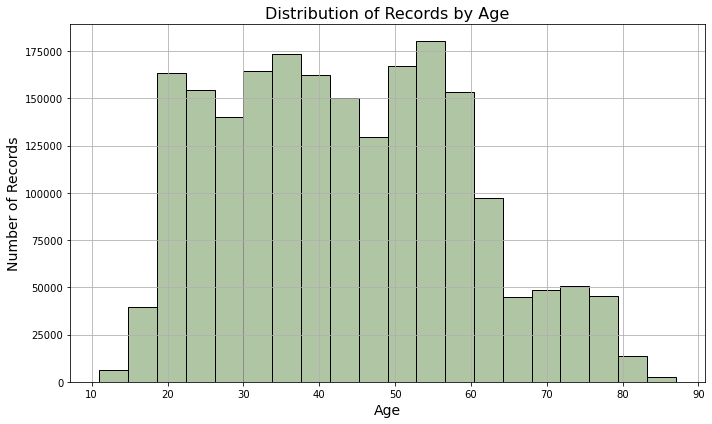

In [904]:
# Count and print the records in the "age" column
average_age_mean = df_merged['age'].mean()
print("Average Age:", average_age_mean)

# Plot the records distribution by age
plt.figure(figsize=(10, 6))
plt.hist(df_merged['age'], bins=20, color='#B0C5A4', edgecolor='black')
plt.title('Distribution of Records by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Average Salary: 381.76214429348903


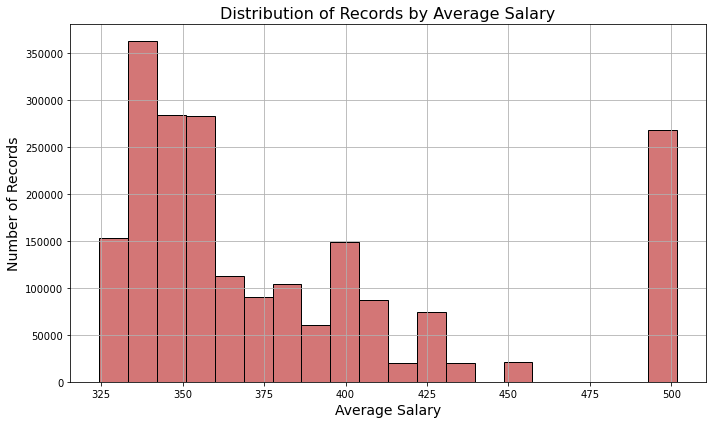

In [905]:
# Count and print the records in the "average_salary" column
average_salary_mean = df_merged['average_salary'].mean()
print("Average Salary:", average_salary_mean)

# Plot the records distribution by average salary
plt.figure(figsize=(10, 6))
plt.hist(df_merged['average_salary'], bins=20, color='#D37676', edgecolor='black')
plt.title('Distribution of Records by Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

debit                 1343035
credit                 716004
withdrawal in cash      28826
Name: trans_type, dtype: int64


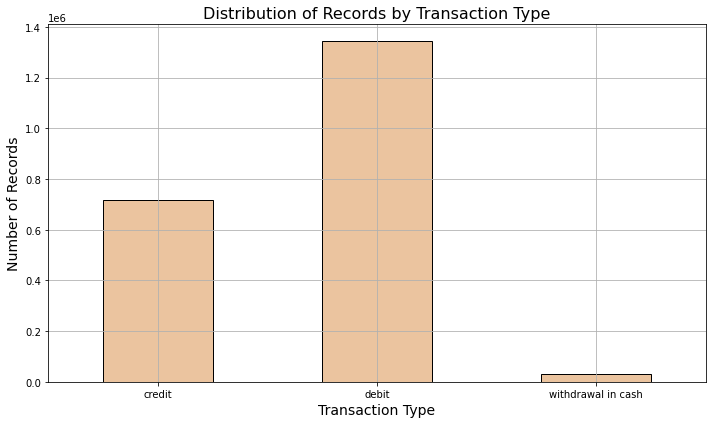

In [906]:
# Count and print the records in the "trans_type" column
trans_type_counts = df_merged['trans_type'].value_counts()
print(trans_type_counts)

# Plot the records distribution by transaction type
plt.figure(figsize=(10, 6))
df_merged['trans_type'].value_counts().sort_index().plot(kind='bar', color='#EBC49F', edgecolor='black')
plt.title('Distribution of Records by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

male      1045670
female    1042195
Name: gender, dtype: int64


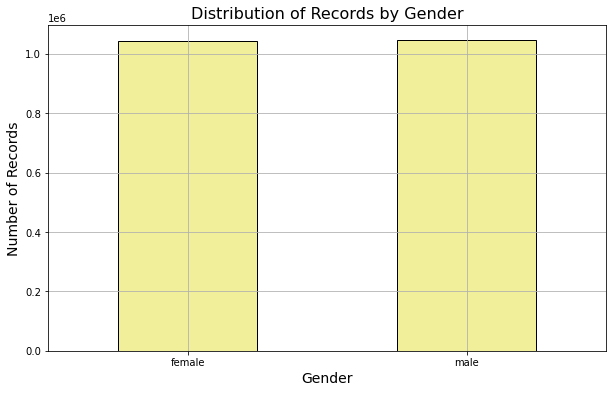

In [907]:
# Count and print the records in the "gender" column
gender_counts = df_merged['gender'].value_counts()
print(gender_counts)

# Plot the records distribution by gender
plt.figure(figsize=(10, 6))
df_merged['gender'].value_counts().sort_index().plot(kind='bar', color='#F1EF99', edgecolor='black')
plt.title('Distribution of Records by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

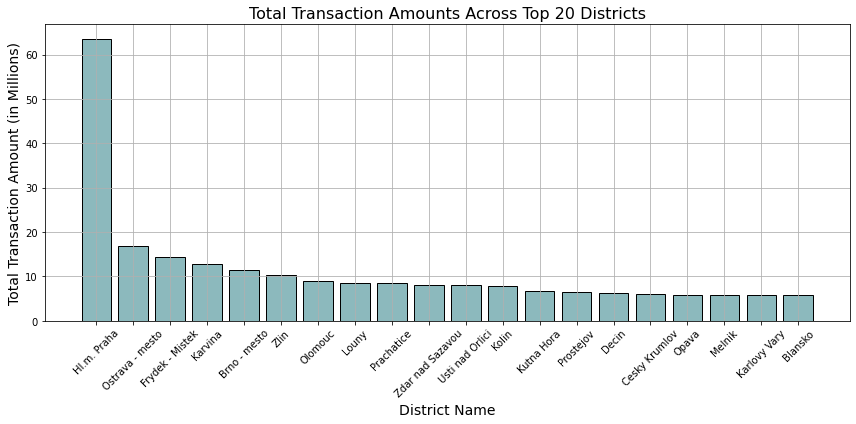

In [908]:
# Calculate total transaction amount for each district
district_transaction_totals = df_merged.groupby('district_name')['trans_amount'].sum() / 1_000_000  # Divide by 1 million for millions

# Select top 20 districts by total transaction amount
top_20_districts = district_transaction_totals.nlargest(20).index

# Filter dataframe to include only data for top 20 districts
df_top_20 = df_merged[df_merged['district_name'].isin(top_20_districts)]

# Create a bar plot to visualize the total sum of transactions across top 20 districts
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.xlabel('District Name', fontsize=14)
plt.bar(top_20_districts, district_transaction_totals[top_20_districts], color='#8CB9BD', edgecolor='black')
plt.ylabel('Total Transaction Amount (in Millions)', fontsize=14)
plt.title('Total Transaction Amounts Across Top 20 Districts', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

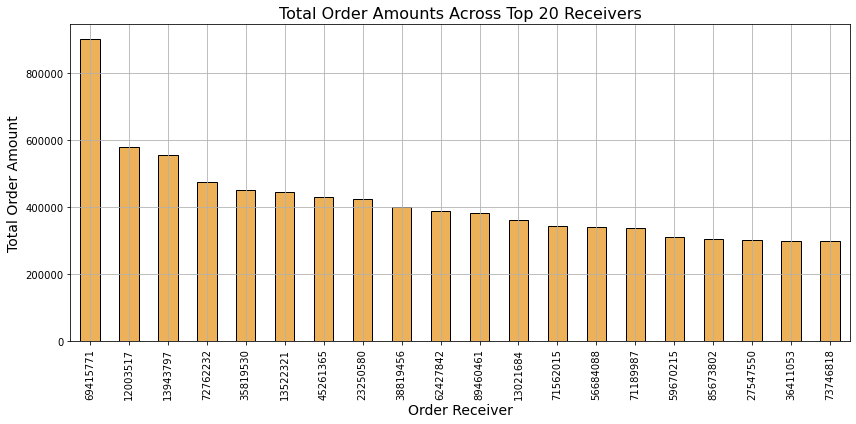

In [909]:
# Calculate total order amount for each receiver
receiver_order_totals = df_merged.groupby('order_receiver')['order_amount'].sum()

# Select top 20 receivers by total order amount
top_20_receivers = receiver_order_totals.nlargest(20)

# Create a bar plot to visualize the total sum of orders across top 20 receivers
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
top_20_receivers.plot(kind='bar', color='#ECB159', edgecolor='black')
plt.xlabel('Order Receiver', fontsize=14)
plt.ylabel('Total Order Amount', fontsize=14)
plt.title('Total Order Amounts Across Top 20 Receivers', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


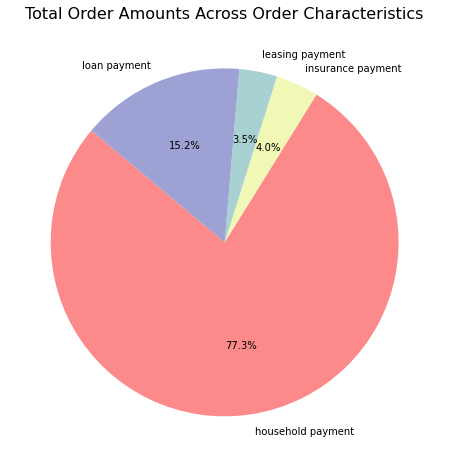

In [910]:
# Calculate total order amount for each order characteristic and convert to millions
order_char_totals_millions = df_merged.groupby('order_char')['order_amount'].sum() / 1_000_000
palette = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4']

# Create a pie chart to visualize the total sum of orders across all order characteristics
plt.figure(figsize=(8, 8))
order_char_totals_millions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=palette)
plt.ylabel('')  # Remove the y-axis label
plt.title('Total Order Amounts Across Order Characteristics', fontsize=16)
plt.show()

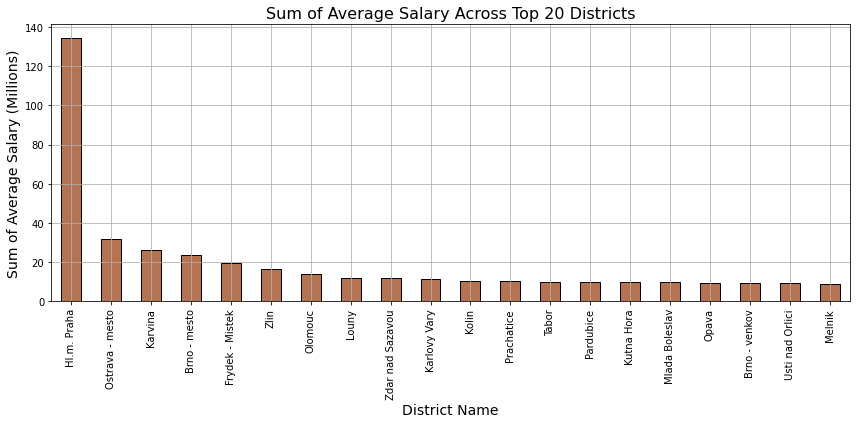

In [911]:
# Calculate the sum of average salaries for each district and convert to millions
district_avg_salary_totals = df_merged.groupby('district_name')['average_salary'].sum() / 1_000_000

# Select top 20 districts by the sum of average salaries
top_20_districts = district_avg_salary_totals.nlargest(20)

# Create a bar plot to visualize the sum of average salaries across top 20 districts
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
top_20_districts.plot(kind='bar', color='#B67352', edgecolor='black')
plt.xlabel('District Name', fontsize=14)
plt.ylabel('Sum of Average Salary (Millions)', fontsize=14)
plt.title('Sum of Average Salary Across Top 20 Districts', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\carol\AppData\Local\Temp/ipykernel_3908/1156189319.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


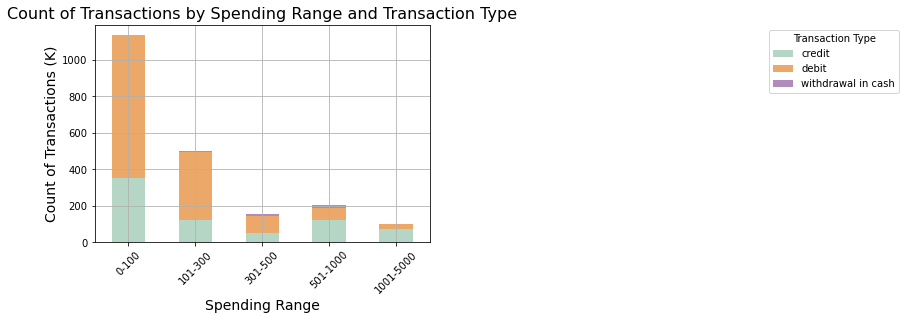

In [912]:
# Define spending ranges
spending_bins = [0, 100, 300, 500, 1000, 5000]
spending_labels = ['0-100', '101-300', '301-500', '501-1000', '1001-5000']
palette = ['#B5D5C5', '#ECA869', '#B08BBB']

# Assign spending range to each transaction
df_merged['spending_range'] = pd.cut(df_merged['trans_amount'], bins=spending_bins, labels=spending_labels)

# Create a bar plot to visualize the count of transactions in each spending range and trans_type
df_plot = df_merged.groupby(['spending_range', 'trans_type']).size().unstack(fill_value=0) / 1000  # Convert to thousands
df_plot.plot(kind='bar', stacked=True, color=palette)
plt.xlabel('Spending Range', fontsize=14)
plt.ylabel('Count of Transactions (K)', fontsize=14)
plt.title('Count of Transactions by Spending Range and Transaction Type', fontsize=16)
plt.legend(title='Transaction Type', bbox_to_anchor=(2,1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Encoding
##### Transform categorical variables into numerical representations

In [913]:
# Split the transaction date into different columns for day, month and year
df_merged.loc[:, 'trans_day'] = df_merged['trans_date'].dt.day
df_merged.loc[:, 'trans_month'] = df_merged['trans_date'].dt.month
df_merged.loc[:, 'trans_year'] = df_merged['trans_date'].dt.year

The gender, district_region and district_name columns might not directly influence fraudulent transactions.

In [914]:
# Drop more unnecessary data
df_merged.drop(columns=['trans_date'], inplace=True)
df_merged.drop(columns=['spending_range'], inplace=True)
df_merged.drop(columns=['gender'], inplace=True)
df_merged.drop(columns=['district_region'], inplace=True)
df_merged.drop(columns=['district_name'], inplace=True)

In [915]:
# Use one-hot encoding to convert categorical variables into binary format
# This creates dummy variables for each unique category in the specified columns
df_encoded = pd.get_dummies(df_merged, columns = ['order_char', 'trans_type', 'trans_mode', 'trans_char']) 
df_encoded.head()

,age,order_amount,order_receiver,trans_amount,trans_receiver,average_salary,trans_day,trans_month,trans_year,order_char_household payment,...,trans_mode_interest credited,trans_mode_remittance to another bank,trans_mode_withdrawal in cash,trans_char_household payment,trans_char_insurance payment,trans_char_interest credited,trans_char_loan payment,trans_char_old-age pension payment,trans_char_payment of statement,trans_char_sanction interest if negative balance
account_id,,,,,,,,,,,,,,,,,,,,,
576,62,146.48,71033382,36.000,45750951.0,349.72,1,1,1993,1,...,0,0,0,0,0,1,0,0,0,0
576,63,146.48,71033382,36.000,45750951.0,349.72,1,1,1993,1,...,0,0,0,0,0,1,0,0,0,0
576,62,146.48,71033382,248.280,30300313.0,349.72,11,1,1993,1,...,0,0,0,0,0,0,0,1,0,0
576,63,146.48,71033382,248.280,30300313.0,349.72,11,1,1993,1,...,0,0,0,0,0,0,0,1,0,0
576,62,146.48,71033382,0.804,45750951.0,349.72,31,1,1993,1,...,1,0,0,0,0,1,0,0,0,0


In [916]:
# Replace the empty spaces by underscores
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

In [917]:
# Print the columns
df_encoded.columns

Index(['age', 'order_amount', 'order_receiver', 'trans_amount',
       'trans_receiver', 'average_salary', 'trans_day', 'trans_month',
       'trans_year', 'order_char_household_payment',
       'order_char_insurance_payment', 'order_char_leasing_payment',
       'order_char_loan_payment', 'trans_type_credit', 'trans_type_debit',
       'trans_type_withdrawal_in_cash',
       'trans_mode_collection_from_another_bank',
       'trans_mode_credit_card_withdrawal', 'trans_mode_credit_in_cash',
       'trans_mode_interest_credited', 'trans_mode_remittance_to_another_bank',
       'trans_mode_withdrawal_in_cash', 'trans_char_household_payment',
       'trans_char_insurance_payment', 'trans_char_interest_credited',
       'trans_char_loan_payment', 'trans_char_old-age_pension_payment',
       'trans_char_payment_of_statement',
       'trans_char_sanction_interest_if_negative_balance'],
      dtype='object')

# 7. Standardization and PCA
##### Apply preprocessing techniques to rescale and reduce the dataset

In [919]:
# Standardize the df_encoded dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Fit the PCA model to the df_scaled
pca = PCA(n_components=0.95) # Target variance of 95
pca.fit(df_scaled)

# Transform the df_scaled using the trained PCA model
pca_data = pca.transform(df_scaled)

# Store the transformed data in the df_pca
df_pca = pd.DataFrame(data=pca_data, columns=[f"T{i+1}" for i in range(pca.n_components_)])

df_pca.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20
0,2.361943,-1.234862,0.121555,0.860109,-1.031949,-0.704694,-0.971534,-0.472431,-0.270506,0.085108,-1.153671,0.225425,0.143756,-0.102798,-0.951107,-1.069653,-0.373085,3.130731,-0.108538,-0.141703
1,2.361879,-1.235077,0.139587,0.867025,-1.023472,-0.706055,-0.965755,-0.465330,-0.261554,0.091278,-1.166163,0.226578,0.145608,-0.110982,-0.956557,-1.060576,-0.418606,3.150659,-0.090234,-0.134537
2,2.292150,-1.938011,4.658657,3.674019,4.247403,0.168192,1.341283,0.232138,0.019505,-0.632746,-0.458325,0.132127,-0.238398,0.323479,-0.527406,-2.030157,1.683542,1.887263,0.287583,-1.300573
3,2.292086,-1.938225,4.676688,3.680935,4.255880,0.166831,1.347062,0.239239,0.028457,-0.626576,-0.470817,0.133280,-0.236546,0.315295,-0.532856,-2.021080,1.638021,1.907191,0.305887,-1.293407
4,2.589922,0.980931,1.709700,-1.805455,-0.466761,-0.056503,-0.137066,0.875104,0.347578,-0.300059,-0.937147,0.182267,0.004687,-0.038046,-0.888358,-1.543487,0.210661,2.278142,0.629142,-0.183096
